This notebook is about preperaring data for trial 1 & 2, and saving the data to use it for later under 
`trial1.csv` & `trial2.csv`.

<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# we get original df from trial 1, but we change it to trial 3 folder
orginal_df = pd.read_csv("../../descriptors-trials/trial 3/data-original.csv", encoding= 'unicode_escape')
output_df = pd.read_csv("../../descriptors-trials/trial 1/output.csv", encoding= 'unicode_escape')
data_descriptors = pd.read_csv("../../descriptors-trials/trial 3/data-descriptors.csv", encoding= 'unicode_escape')

In [3]:
orginal_df.shape, output_df.shape, data_descriptors.shape

((476, 20), (481, 17537), (476, 225))

In [4]:
orginal_df.head(2)

,No,Compound,SMILES,CAS No,set,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,MVh,Texpi,Skin thicknessj,Skin Integrity testk,Skin Selection criteria,logkpl,logJmaxm,Reference
0,80,Urea,C(=O)(N)N,57-13-6,t,60.1,-2.11,406.0,-1.85,-3.96,4,3,36.7,312,0.1,transepidermal electrical resistance,20-130 Kohmcm2,-3.55,-5.41,(Peck et al. 1995)
1,81,Urea,C(=O)(N)N,57-13-6,t,60.1,-2.11,406.0,-2.02,-4.13,4,3,36.7,300,0.1,transepidermal electrical resistance,20-130 Kohmcm2,-3.69,-5.71,(Peck et al. 1995)


In [5]:
output_df.head(2)

,Name,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,AUTOGEN_data_1,0,0.1998,0.039920,6.4546,17.399965,6,6,15,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AUTOGEN_data_2,0,-2.8475,8.108256,35.7706,31.873067,0,0,31,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_descriptors.head(2)

,SMILES,Texpi,ALogP,ALogp2,AMR,apol,nAcid,naAromAtom,nAromBond,nAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,0,8,...,60.05531,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
1,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,0,8,...,60.05531,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0


In [7]:
compound_smiles = pd.concat([orginal_df[['Compound']], data_descriptors[['SMILES']]], axis=1)
compound_smiles

,Compound,SMILES
0,Urea,C(=O)(N)N
1,Urea,C(=O)(N)N
2,Urea,C(=O)(N)N
3,Urea,C(=O)(N)N
4,Urea,C(=O)(N)N
...,...,...
471,water,O
472,water,O
473,water,O
474,water,O


In [8]:
# starting from index 401 - 431 (432 exlcuded) removing water compounds
index_to_drop = [i for i in range(401, 432)]

In [9]:
compound_smiles = compound_smiles.drop(index_to_drop, axis=0).reset_index(drop=True)
compound_smiles

,Compound,SMILES
0,Urea,C(=O)(N)N
1,Urea,C(=O)(N)N
2,Urea,C(=O)(N)N
3,Urea,C(=O)(N)N
4,Urea,C(=O)(N)N
...,...,...
440,water,O
441,water,O
442,water,O
443,water,O


In [10]:
compound_smiles.to_csv('../../data/processed/compound_smiles.csv', index=False)

In [11]:
clean_output_df = output_df.copy()

In [12]:
# dropping Name column
clean_output_df.drop('Name', axis=1, inplace=True)

In [13]:
clean_output_df.head(2)

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,0,0.1998,0.039920,6.4546,17.399965,6,6,15,10,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-2.8475,8.108256,35.7706,31.873067,0,0,31,12,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
count = np.isinf(clean_output_df).values.sum()
print("It contains " + str(count) + " infinite values")

# counting infinity in a particular column name
# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = clean_output_df.columns.to_series()[np.isinf(clean_output_df).any()]
print(col_name)

# printing row index with infinity
print()
print("printing row index with infinity ")

r = clean_output_df.index[np.isinf(clean_output_df).any(1)]
print(r)

It contains 341 infinite values

printing column name where infinity is present
ATS0s        ATS0s
ATS1s        ATS1s
AATS0s      AATS0s
AATS1s      AATS1s
ATSC2s      ATSC2s
AATSC2s    AATSC2s
VR3_Dt      VR3_Dt
sumI          sumI
meanI        meanI
gmax          gmax
VR3_D        VR3_D
dtype: object

printing row index with infinity 
Int64Index([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
            414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
            427, 428, 429, 430, 431],
           dtype='int64')


In [17]:
clean_output_df.iloc[r, :][col_name]

,ATS0s,ATS1s,AATS0s,AATS1s,ATSC2s,AATSC2s,VR3_Dt,sumI,meanI,gmax,VR3_D
401,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
402,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
403,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
404,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
405,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
406,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
407,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
408,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
409,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf
410,inf,inf,inf,inf,inf,inf,-inf,inf,inf,inf,-inf


In [18]:
clean_output_df = clean_output_df.replace([np.inf, -np.inf], np.nan)
clean_output_df = clean_output_df.reset_index(drop=True)

In [19]:
count = np.isinf(clean_output_df).values.sum()
print("It contains " + str(count) + " infinite values")

# counting infinity in a particular column name
# printing column name where infinity is present
print()
print("printing column name where infinity is present")
# col_name = clean_output_df.columns.to_series()[np.isinf(clean_output_df).any()]
# print(col_name)

# printing row index with infinity
print()
print("printing row index with infinity ")

# r = clean_output_df.index[np.isinf(clean_output_df).any(1)]

It contains 0 infinite values

printing column name where infinity is present

printing row index with infinity 


In [20]:
clean_output_df.iloc[r, :][col_name]

,ATS0s,ATS1s,AATS0s,AATS1s,ATSC2s,AATSC2s,VR3_Dt,sumI,meanI,gmax,VR3_D
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for col in col_name:
    clean_output_df[col].fillna(clean_output_df[col].mean(), inplace=True)

In [22]:
clean_output_df.iloc[r, :][col_name]

,ATS0s,ATS1s,AATS0s,AATS1s,ATSC2s,AATSC2s,VR3_Dt,sumI,meanI,gmax,VR3_D
401,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
402,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
403,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
404,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
405,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
406,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
407,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
408,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
409,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357
410,159.651365,98.230614,5.627386,3.262673,1.914957,0.094332,9.021178,38.01382,2.567743,10.280028,9.024357


In [23]:
for col in clean_output_df.columns:
    if clean_output_df[col].isna().sum() > 0:
        print(col, clean_output_df[col].isna().sum())
        clean_output_df[col].fillna(clean_output_df[col].mean(), inplace=True)

ATSC0s 31
ATSC1s 31
AATSC0s 31
AATSC1s 31
SpAbs_DzZ 31
SpMax_DzZ 31
SpDiam_DzZ 31
SpAD_DzZ 31
SpMAD_DzZ 31
EE_DzZ 31
SM1_DzZ 31
VE1_DzZ 31
VE2_DzZ 31
VE3_DzZ 31
VR1_DzZ 31
VR2_DzZ 31
VR3_DzZ 31
SpAbs_Dzm 31
SpMax_Dzm 31
SpDiam_Dzm 31
SpAD_Dzm 31
SpMAD_Dzm 31
EE_Dzm 31
SM1_Dzm 31
VE1_Dzm 31
VE2_Dzm 31
VE3_Dzm 31
VR1_Dzm 31
VR2_Dzm 31
VR3_Dzm 31
SpAbs_Dzv 31
SpMax_Dzv 31
SpDiam_Dzv 31
SpAD_Dzv 31
SpMAD_Dzv 31
EE_Dzv 31
SM1_Dzv 31
VE1_Dzv 31
VE2_Dzv 31
VE3_Dzv 31
VR1_Dzv 31
VR2_Dzv 31
VR3_Dzv 31
SpAbs_Dze 31
SpMax_Dze 31
SpDiam_Dze 31
SpAD_Dze 31
SpMAD_Dze 31
EE_Dze 31
SM1_Dze 31
VE1_Dze 31
VE2_Dze 31
VE3_Dze 31
VR1_Dze 31
VR2_Dze 31
VR3_Dze 31
SpAbs_Dzp 31
SpMax_Dzp 31
SpDiam_Dzp 31
SpAD_Dzp 31
SpMAD_Dzp 31
EE_Dzp 31
SM1_Dzp 31
VE1_Dzp 31
VE2_Dzp 31
VE3_Dzp 31
VR1_Dzp 31
VR2_Dzp 31
VR3_Dzp 31
SpAbs_Dzi 31
SpMax_Dzi 31
SpDiam_Dzi 31
SpAD_Dzi 31
SpMAD_Dzi 31
EE_Dzi 31
SM1_Dzi 31
VE1_Dzi 31
VE2_Dzi 31
VE3_Dzi 31
VR1_Dzi 31
VR2_Dzi 31
VR3_Dzi 31
SpAbs_Dzs 31
SpMax_Dzs 31
SpDiam_Dzs 31
SpAD_D

In [24]:
# getting `logkpl` & `Texpi` from original df
texpi_logkpl = orginal_df[['logkpl', 'Texpi']]
texpi_logkpl.isna().sum()

logkpl    0
Texpi     0
dtype: int64

In [25]:
# making the trial 1 file 
trial_1_df = pd.concat([texpi_logkpl, clean_output_df], axis=1)
trial_1_df.reset_index(drop=True, inplace=True)
trial_1_df.shape

(481, 17538)

In [26]:
trial_1_df.isna().sum().sum()

10

In [27]:
# saving trial 1 file
trial_1_df.to_csv('../../data/processed/trial1.csv', index=False)

In [28]:
# starting from index 401 - 431 (432 exlcuded) removing water compounds
index_to_drop = [i for i in range(401, 432)]

In [29]:
tries = output_df.drop(index_to_drop, axis=0)
texpi_logkpl_trial_2 = texpi_logkpl.drop(index_to_drop, axis=0)

In [30]:
for col in tries.columns:
    if tries[col].isna().sum() > 0:
        print(col, tries[col].isna().sum())
        tries[col] = tries[col].fillna(tries[col].mean())

SpMax7_Bhm 3
SpMax8_Bhm 3
SpMin7_Bhm 3
SpMin8_Bhm 3
SpMax7_Bhv 3
SpMax8_Bhv 3
SpMin7_Bhv 3
SpMin8_Bhv 3
SpMax7_Bhe 3
SpMax8_Bhe 3
SpMin7_Bhe 3
SpMin8_Bhe 3
SpMax7_Bhp 3
SpMax8_Bhp 3
SpMin7_Bhp 3
SpMin8_Bhp 3
SpMax7_Bhi 3
SpMax8_Bhi 3
SpMin7_Bhi 3
SpMin8_Bhi 3
SpMax7_Bhs 3
SpMax8_Bhs 3
SpMin7_Bhs 3
SpMin8_Bhs 3
Kier3 12


In [31]:
tries.shape

(450, 17537)

In [32]:
# drop name column
tries.drop('Name', axis=1, inplace=True)

In [33]:
# making the trial 2 file 
trial_2_df = pd.concat([texpi_logkpl_trial_2, tries], axis=1)
trial_2_df.reset_index(drop=True, inplace=True)
trial_2_df.shape

(450, 17538)

In [34]:
trial_2_df.isna().sum().sum()

10

In [35]:
# saving trial 2 file
trial_2_df.to_csv('../../data/processed/trial2.csv', index=False)

In [36]:
data_descriptors.head(1)

,SMILES,Texpi,ALogP,ALogp2,AMR,apol,nAcid,naAromAtom,nAromBond,nAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,0,8,...,60.05531,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0


In [37]:
# let's make logkpl dataframe to use it for later
logkpl_df = orginal_df[['logkpl', 'Compound']]

Remove water rows  starting from index 401 - 431 (432 exlcuded) removing water compounds

In [38]:
# starting from index 445 - 476 (432 exlcuded) removing water compounds
index_to_drop = [i for i in range(445, 476)]

In [39]:
# remove the rows from our dataframes
clean_data_descriptors = data_descriptors.drop(index_to_drop, axis=0)
clean_data_descriptors.reset_index(inplace=True, drop=True)

logkpl_df = logkpl_df.drop(index_to_drop, axis=0)
logkpl_df.reset_index(inplace=True, drop=True)

In [40]:
logkpl_df.shape, clean_data_descriptors.shape

((445, 2), (445, 225))

In [43]:
for col in data_descriptors.columns:
    if data_descriptors[col].isna().sum() > 0:
        print(col, data_descriptors[col].isna().sum())
        #data_descriptors[col] = tries[col].fillna(tries[col].mean())

HybRatio 31
JPLogP 31
Kier3 12
topoShape 31
geomShape 476


remove `geomShape` & `SMILES` columns from data descsriptors, and fill the rest with mean for now.

In [47]:
clean_data_descriptors = clean_data_descriptors.drop(["geomShape"], axis=1)

<AxesSubplot:>

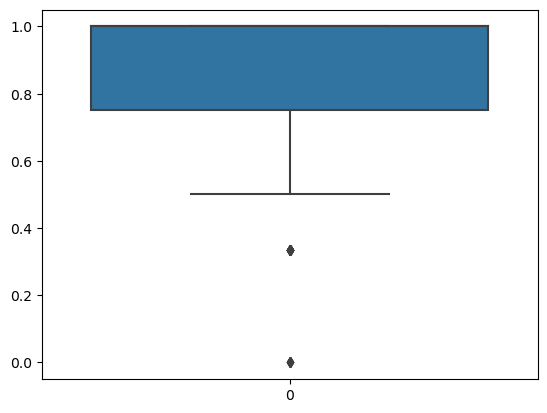

In [59]:
sns.boxplot(clean_data_descriptors['topoShape'])

In [62]:
clean_data_descriptors['topoShape'].describe()

count    445.000000
mean       0.847435
std        0.200462
min        0.000000
25%        0.750000
50%        1.000000
75%        1.000000
max        1.000000
Name: topoShape, dtype: float64

<AxesSubplot:>

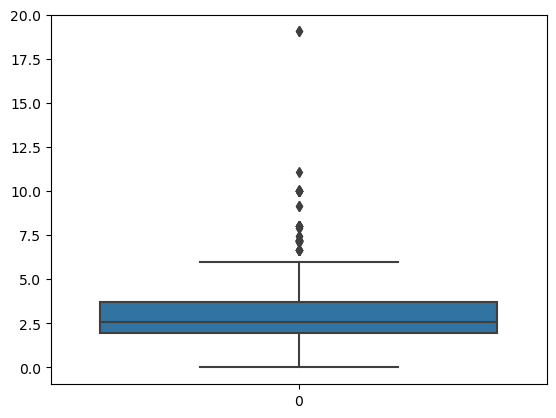

In [58]:
sns.boxplot(clean_data_descriptors['Kier3'])

In [63]:
mean_cols = ['topoShape']
median_cols = ['HybRatio', 'JPLogP', 'Kier3']

In [64]:
# filling by mean
for col in clean_data_descriptors.columns:
    if clean_data_descriptors[col].isna().sum() > 0:
        print(col, clean_data_descriptors[col].isna().sum())
        if col in mean_cols:
            clean_data_descriptors[col] = clean_data_descriptors[col].fillna(clean_data_descriptors[col].mean())
        if col in median_cols:
            clean_data_descriptors[col] = clean_data_descriptors[col].fillna(clean_data_descriptors[col].median())

Kier3 12


In [65]:
clean_data_descriptors.isna().sum().sum()

0

In [66]:
clean_data_descriptors.shape

(445, 224)

In [67]:
logkpl_df.shape

(445, 2)

In [68]:
trial_4_df = pd.concat([logkpl_df, clean_data_descriptors], axis=1)
trial_4_df.shape

(445, 226)

In [69]:
trial_4_df

,logkpl,Compound,SMILES,Texpi,ALogP,ALogp2,AMR,apol,nAcid,naAromAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-3.55,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
1,-3.69,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
2,-3.83,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
3,-3.95,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
4,-3.93,Urea,C(=O)(N)N,312,-1.0421,1.085972,13.1426,7.429172,0,0,...,60.055310,6.732051,1.683013,6.732051,2.244017,4.488034,9.0,0.0,-1.686,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-3.68,Methylglucose,COC(C(C=O)O)C(C(CO)O)O,310,-2.2754,5.177445,42.1719,26.467102,0,0,...,194.182751,24.142258,1.857097,14.920659,14.920659,0.000000,252.0,18.0,-2.806,54.0
441,-1.56,Eugenol,COC1=C(C=CC(=C1)CC=C)O,305,2.5541,6.523427,48.5026,27.205516,0,6,...,164.201458,23.427332,1.952278,5.304497,5.304497,0.000000,204.0,15.0,2.556,54.0
442,-1.59,Eugenol,COC1=C(C=CC(=C1)CC=C)O,305,2.5541,6.523427,48.5026,27.205516,0,6,...,164.201458,23.427332,1.952278,5.304497,5.304497,0.000000,204.0,15.0,2.556,54.0
443,-2.07,Methyl methanesulfonate,COS(=O)(=O)C,305,-0.3747,0.140400,21.6541,12.826758,0,0,...,110.133416,10.465990,1.744332,10.298097,7.194544,0.000000,28.0,3.0,-0.869,24.0


In [70]:
# saving trial 4 file
trial_4_df.to_csv('../../data/processed/trial4.csv', index=False)

In [71]:
# we remove texpi and that's our trial 5
trial_5_df = trial_4_df.drop('Texpi', axis=1)
trial_5_df.shape

(445, 225)

In [72]:
# saving trial 2 file
trial_5_df.to_csv('../../data/processed/trial5.csv', index=False)